In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Read File
file = 'breastCancer.csv'
df = pd.read_csv(file)
df.info()
df.isnull().sum()

In [ ]:
# Clean data
df = df.dropna(how='all', axis='columns')
df = df.drop(labels='id', axis='columns')
df = df.replace(to_replace=['M', 'B'], value=['1', '0'])

df.head()

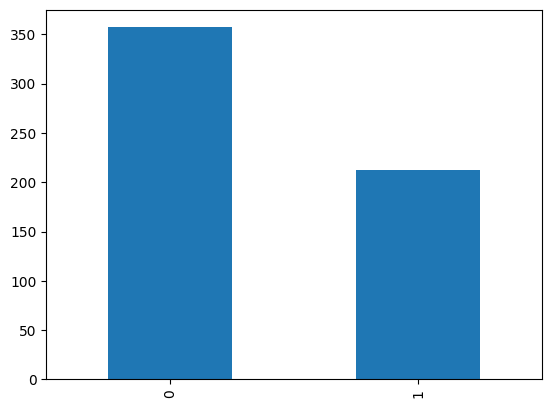

In [32]:
# Set data
ax = df['diagnosis'].value_counts().plot(kind='bar')

x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].values

# Data split
xtrain, xtest, ytrain, ytest, = train_test_split(x, y, test_size=0.3, random_state=45)

In [33]:
# Training - Multi Layer Perceptron
model = MLPClassifier(alpha=1, max_iter=2000)
model.fit(xtrain, ytrain)

print("Train: ", {model.score(xtrain, ytrain)})
print("Test: ", {model.score(xtest, ytest)})

Train:  {0.9472361809045227}
Test:  {0.9473684210526315}


In [35]:
# Classification Report
ytrainpred = model.predict(xtrain)
ytestpred = model.predict(xtest)

print("Classification Report: \n", classification_report(ytest, ytestpred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       110
           1       0.98      0.87      0.92        61

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



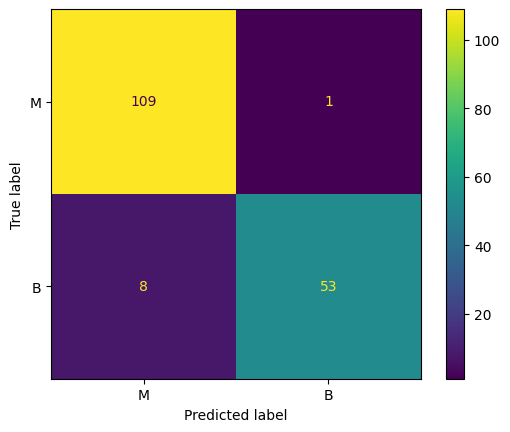

In [39]:
# Confusion Matrix
class_names=["M","B"]
cm = confusion_matrix(ytest, ytestpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()